In [1]:
# Imports
%pylab inline
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sn
from math import sin, cos, sqrt, atan2, radians
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read Dataset
oriData = pd.read_csv('lateste.csv')

In [168]:
# Data Clean
oriData.AtLatitude = oriData['AtLatitude'].astype('float') 
oriData.AtLongitude = oriData['AtLongitude'].astype('float') 
oriData.AtLatitudeIni = oriData['AtLatitudeIni'].astype('float') 
oriData.AtLongitudeIni = oriData['AtLongitudeIni'].astype('float') 
oriData.AtLatitudeEnd = oriData['AtLatitudeEnd'].astype('float') 
oriData.AtLongitudeEnd = oriData['AtLongitudeEnd'].astype('float') 

In [169]:
#distance between lat/lon

kmList = []

for i in range(oriData.shape[0]):
    R = 6373.0

    lat1 = radians(oriData.loc[i, 'AtLatitude'])
    lon1 = radians(oriData.loc[i, 'AtLongitude'])
    lat2 = radians(oriData.loc[i, 'AtLatitudeIni'])
    lon2 = radians(oriData.loc[i, 'AtLongitudeIni' ])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    saved_km = R * c
    kmList.append(saved_km)
    
oriData['kmIni'] = kmList

# ----------------------------------------------#

kmList = []

for i in range(oriData.shape[0]):
    R = 6373.0

    lat1 = radians(oriData.loc[i, 'AtLatitude'])
    lon1 = radians(oriData.loc[i, 'AtLongitude'])
    lat2 = radians(oriData.loc[i, 'AtLatitudeEnd'])
    lon2 = radians(oriData.loc[i, 'AtLongitudeEnd' ])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    saved_km = R * c
    kmList.append(saved_km)
    
oriData['kmEnd'] = kmList

In [170]:
# Validating if Gloss
gloss = []

for i in range(oriData.shape[0]):
    var1 = oriData.loc[i, 'kmIni']
    var2 = oriData.loc[i, 'kmEnd']

    if var1>1 or var2>1:
         gloss.append(1)
    else:
        gloss.append(0)
        
oriData['AtGloss'] = gloss

In [63]:
oriData.describe()

,PaID,PaSex,PrID,PrExperience,AtIntercurrence,AtTotalTime,AtLatitude,AtLongitude,AtLatitudeIni,AtLongitudeIni,AtLatitudeEnd,AtLongitudeEnd,kmIni,kmEnd,AtGloss
count,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000
mean,1843.827519,1.590326,3285.076579,2.672286,0.185838,82.474647,-22.744191,-46.777524,-22.887962,-46.712458,-22.888452,-46.712961,20.687286,21.509419,0.267086
std,1978.834087,0.491921,4299.057721,1.168834,0.388989,279.555751,3.791555,2.282602,2.062888,1.449344,2.063110,1.449378,385.305299,385.335619,0.442452
min,4.000000,0.000000,42.000000,1.000000,0.000000,11.000000,-30.890569,-106.145138,-30.153771,-63.875543,-30.154359,-63.875599,0.000000,0.000030,0.000000
25%,317.000000,1.000000,243.000000,2.000000,0.000000,26.000000,-23.608631,-46.754898,-23.607007,-46.754749,-23.607803,-46.754764,0.015233,0.020371,0.000000
50%,1106.000000,2.000000,1364.000000,3.000000,0.000000,38.000000,-23.565131,-46.636857,-23.565152,-46.637260,-23.565343,-46.637887,0.042408,0.066879,0.000000
75%,2895.000000,2.000000,4332.000000,4.000000,0.000000,56.000000,-23.456126,-46.582916,-23.454314,-46.584062,-23.438514,-46.584975,0.232722,0.985344,1.000000
max,7354.000000,2.000000,17474.000000,5.000000,1.000000,17395.000000,55.647634,41.993283,2.832068,-34.886257,2.832162,-34.885842,11970.320012,11970.322783,1.000000


In [172]:
# data = oriData.drop(["PaID","AtLatitude","AtLongitude","AtLatitudeIni","AtLongitudeIni","AtLatitudeEnd","AtLongitudeEnd","AtDateIni","AtDateEnd", "kmIni","kmEnd"], axis=1)


data = oriData

In [173]:
data.head()

,PaID,PaBirth,PaSex,PrID,PrExperience,AtInsurance,AtSpecialty,AtCategory,AtData,AtDataWeek,...,AtEvolution,AtLatitude,AtLongitude,AtLatitudeIni,AtLongitudeIni,AtLatitudeEnd,AtLongitudeEnd,kmIni,kmEnd,AtGloss
0,113,16-01-1936,1,371,4,Plasac,Respiratória,Fisioterapia,01-01-2017,Sun,...,paciente encontra-se dispneico ausculta pulmon...,-23.583399,-46.606929,-23.583612,-46.607359,-23.592648,-46.612198,0.049834,1.160572,1
1,123,01-02-1977,2,204,3,São Cristóvão,Ortopédica,Fisioterapia,01-01-2017,Sun,...,"Paciente TQT, consciente , PA 110x70, AP: Mv+c...",-23.594203,-46.549980,-23.597950,-46.551170,-23.592030,-46.554070,0.434069,0.481860,0
2,1359,23-11-1931,2,1364,3,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,...,"encontro pacte sentada vendo tv,feito curativo...",-21.829869,-47.244037,-21.829885,-47.244189,-21.829872,-47.244072,0.015736,0.003583,0
3,1868,17-01-1936,2,3310,2,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,...,Administrado antibioticoterapia conforme presc...,-21.122275,-48.447525,-21.121387,-48.447771,-21.120841,-48.447641,0.101960,0.159898,0
4,2032,26-04-1933,1,3176,2,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,...,administrado medicação conforme prescrição méd...,-21.256677,-48.317548,-21.256818,-48.317714,-21.256379,-48.317703,0.023305,0.036940,0


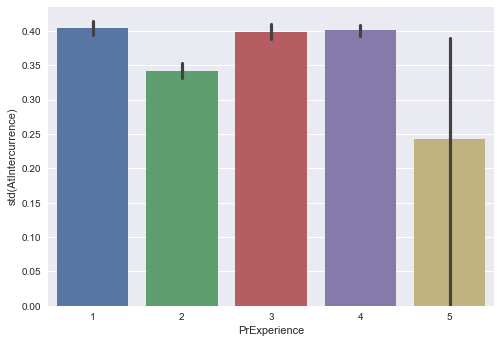

In [22]:
sn.barplot(x= 'PrExperience', y= 'AtIntercurrence', data= data, estimator= np.std)

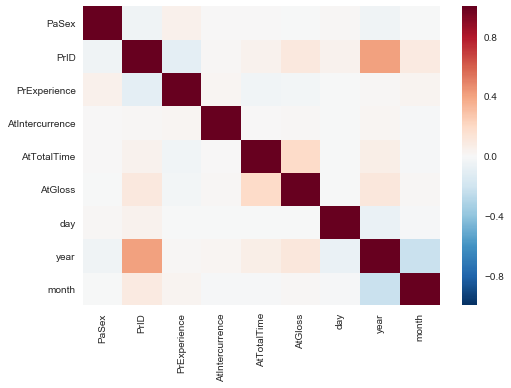

In [133]:
corr = data.corr()
sn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

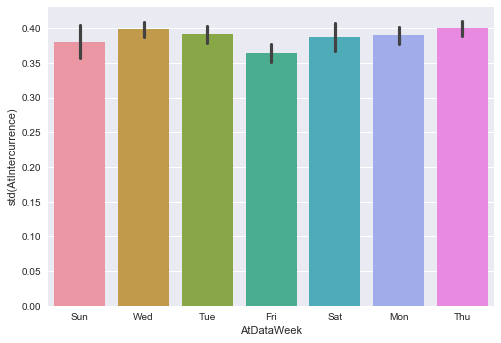

In [21]:
sn.barplot(x= 'AtDataWeek', y= 'AtIntercurrence', data= data, estimator= np.std)

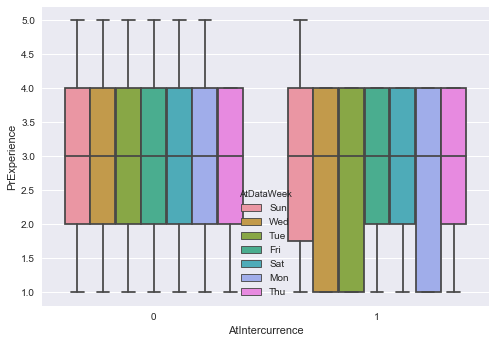

In [31]:
sn.boxplot(x='AtIntercurrence',y='PrExperience', data=data, hue="AtDataWeek")

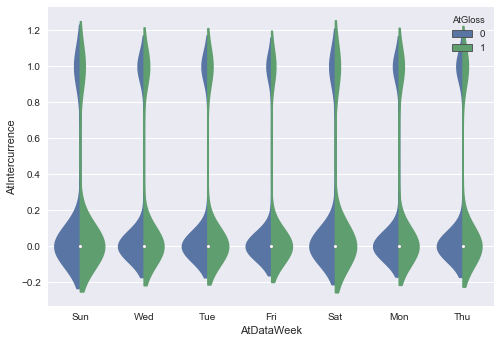

In [32]:
sn.violinplot(x='AtDataWeek', y='AtIntercurrence', data=data, hue='AtGloss', split='true')

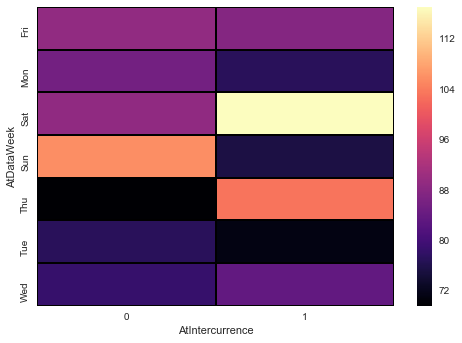

In [38]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

fp = data.pivot_table(index='AtDataWeek', columns="AtIntercurrence", values="AtTotalTime")
sn.heatmap(fp, cmap='magma', linecolor= 'black', linewidths= 1)


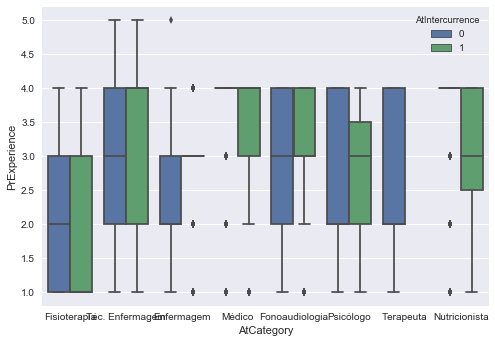

In [44]:
sn.boxplot(x="AtCategory", y="PrExperience", hue="AtIntercurrence", data=data);

In [56]:
data.groupby(['AtSpecialty', 'AtIntercurrence'])[['AtIntercurrence']].count()

# sn.barplot(x='AtIntercurrence', y='AtSpecialty', data=data, ci=None, )

AtIntercurrence
AtSpecialty              AtIntercurrence                 
Aplicação de Medicamento 0                            393
                         1                             21
Audição                  0                             15
                         1                              1
Cardiologista            0                              3
Clínico Geral            0                           1054
                         1                            459
Coleta Domiciliar        0                              7
                         1                              1
Curativo                 0                             24
                         1                              5
Dermatologista           0                              1
                         1                              1
Disfagia                 0                           1404
                         1                            272
Enfermeiro Visitador     0                           1812
                         1                            460
Estomaterapia            0                              3
Geriatra                 0                             48
                         1                             17
Geriátrica               0                             54
                         1                              2
Linguagem                0                             54
                         1                              2
Neurológica              0                            131
                         1                              5
Nutricionista            0                            726
                         1                             39
Ortopédica               0                           2520
                         1                            641
Otorrinolaringologia     0                              1
Pediatra                 0                             94
                         1                             52
Pediátrica               0                              8
Procedimento             0                           2069
                         1                            515
Procedimento Téc. Enf.   0                             68
                         1                              2
Psicólogo                0                            211
                         1                              3
Psiquiatria              0                              1
Respiratória             0                           1414
                         1                            368
Terapeuta Ocupacional    0                            434
Voz                      0                              7

In [176]:
data['AtData'] = pd.to_datetime(data.AtData)
data.AtData.dtype

dtype('<M8[ns]')

In [177]:
data['year'] = data.AtData.dt.year
data['month'] = data.AtData.dt.month
data['day'] = data.AtData.dt.day

In [93]:
data.year.value_counts()

2017    10236
2016     5186
Name: year, dtype: int64

In [81]:
data[data['PrID'] == 2012].groupby(['AtIntercurrence', 'AtSpecialty'])['AtIntercurrence'].count()

AtIntercurrence  AtSpecialty
0                Disfagia       12
1                Disfagia       77
                 Linguagem       1
Name: AtIntercurrence, dtype: int64

In [85]:
data[data['AtSpecialty'] == 'Disfagia'].groupby(['AtIntercurrence'])['AtIntercurrence'].count()

AtIntercurrence
0    1404
1     272
Name: AtIntercurrence, dtype: int64

In [86]:
data[(data['PrID'] == 2012) & (data['year'] == 2016) & (data['month'] == 12)& (data['day'] == 20)]

,PaBirth,PaSex,PrID,PrExperience,AtInsurance,AtSpecialty,AtCategory,AtData,AtDataWeek,AtIntercurrence,AtTotalTime,AtEvolution,AtGloss,day,year,month
9923,31-03-1947,2,2012,4,Metrus,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,29,Paciente já recebia atendimento fonoaudiológic...,0,20,2016,12
9933,12-11-1925,2,2012,4,Plasac,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,15,Realizada a avaliação fonoaudiológica.\nA paci...,0,20,2016,12
9934,01-04-1923,2,2012,4,Plasac,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,30,"Foi ofertado alimentação sólida e líquida, apr...",0,20,2016,12
9935,16-01-1936,1,2012,4,Plasac,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,24,Realizada técnica de bandagens e orientei a fa...,0,20,2016,12
9936,16-02-1926,2,2012,4,Plasac,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,22,"Paciente está com \""sapinho\"" na cavidade oral...",0,20,2016,12
9937,01-11-1931,2,2012,4,Plasac,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,32,Hemi corpo esquerdo paralisado\nRealizado exer...,0,20,2016,12
9938,30-12-1936,1,2012,4,Plasac,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,34,"Paciente com AVE, disfagia, hemi face esquerda...",0,20,2016,12
9939,30-12-1936,1,2012,4,Plasac,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,25,"Apresentou muita aspiração de saliva, realizei...",0,20,2016,12
9943,29-01-1931,2,2012,4,São Cristóvão,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,28,"Apresenta indícios de disfagia leve, baixa ton...",0,20,2016,12
9954,12-11-2004,1,2012,4,Unimed - CNU,Disfagia,Fonoaudiologia,2016-12-20,Tue,1,32,Realizada avaliação de disfagia.\nAspectos de ...,0,20,2016,12


In [112]:
data.groupby(['AtInsurance', 'AtIntercurrence'])[['AtIntercurrence']].count().rename(
    columns={'AtIntercurrence':'cnt'}).reset_index().sort_values(['AtInsurance','cnt'], ascending=False)

,AtInsurance,AtIntercurrence,cnt
75,Vitallis (Crônicos),0,45
76,Vitallis (Crônicos),1,7
73,Vitallis,0,169
74,Vitallis,1,60
71,Vale Saúde,0,8
72,Vale Saúde,1,1
69,Unimed - CNU,0,158
70,Unimed - CNU,1,35
67,UNIMED POA,0,34
68,UNIMED POA,1,8


In [129]:
test = data.groupby(['month', 'AtIntercurrence'])[['AtIntercurrence']].count().sort_values('AtIntercurrence', ascending=False)
test.columns = ['cnt']
test.reset_index(inplace=True)

test_dict = {}

for i in test.month.unique().tolist():
    test_dict[i] = test[test['month'] == i].cnt / test[test['month'] == i].cnt.sum()
    
trial = pd.DataFrame(test_dict)

test['ratio'] =  trial[trial.columns[0:]].apply(lambda x: ','.join(x.dropna().astype(float).astype(str)),axis=1)

test

,month,AtIntercurrence,cnt,ratio
0,9,0,1408,0.812933025404
1,8,0,1304,0.834827144686
2,10,0,1257,0.824262295082
3,7,0,1224,0.82092555332
4,6,0,1182,0.792756539235
5,3,0,1024,0.793183578621
6,4,0,1018,0.790372670807
7,5,0,995,0.79093799682
8,11,0,884,0.841103710752
9,12,0,848,0.811483253589


In [97]:
data.groupby(['PrID', 'year', 'month', 'day', 'AtIntercurrence'])[['day']].count().sort_values('day', ascending=False)

day
PrID  year month day AtIntercurrence     
2012  2016 12    20  1                 11
                 22  1                 10
                 29  1                 10
130   2017 8     24  0                  8
2012  2016 12    27  1                  8
130   2017 8     22  0                  8
110   2017 7     9   0                  7
2012  2016 12    28  1                  7
110   2016 3     17  0                  7
2012  2016 12    26  1                  7
130   2017 9     10  0                  7
2162  2017 3     27  0                  7
130   2017 7     25  0                  7
110   2017 12    10  0                  6
130   2017 9     21  0                  6
110   2016 12    15  0                  6
1290  2016 8     9   0                  6
130   2017 9     28  0                  6
110   2016 5     26  0                  6
130   2017 6     20  0                  6
110   2017 6     15  1                  6
      2016 4     14  0                  6
      2017 10    8   0                  6
      2016 7     21  0                  6
      2017 3     16  0                  6
8139  2017 11    7   1                  6
110   2016 7     28  0                  6
           8     15  0                  6
764   2016 4     27  1                  6
110   2016 12    29  0                  6
...                                   ...
1026  2017 9     1   0                  1
           10    20  0                  1
                 21  1                  1
           11    8   0                  1
                 13  0                  1
           12    9   0                  1
1036  2016 3     11  0                  1
           8     11  0                  1
1026  2017 4     26  0                  1
           2     16  0                  1
                 2   0                  1
           1     19  0                  1
      2016 7     15  0                  1
                 20  0                  1
                 24  0                  1
                 25  0                  1
                 27  0                  1
           8     31  0                  1
           9     28  0                  1
           10    10  0                  1
                 31  0                  1
           11    11  0                  1
                 21  0                  1
                 24  0                  1
           12    11  0                  1
                 13  1                  1
                 14  0                  1
                 16  0                  1
                 19  0                  1
17474 2017 11    15  0                  1

[12493 rows x 1 columns]

In [178]:
# dMonth = pd.get_dummies(data.month, prefix='MON_', drop_first=True)
# dMonth.head()

# df_test = pd.concat([data, dMonth], axis=1)

In [180]:
df_test.columns

Index([u'PaID', u'PaBirth', u'PaSex', u'PrID', u'PrExperience', u'AtInsurance',
       u'AtSpecialty', u'AtCategory', u'AtData', u'AtDataWeek',
       u'AtIntercurrence', u'AtDateIni', u'AtDateEnd', u'AtTotalTime',
       u'AtEvolution', u'AtLatitude', u'AtLongitude', u'AtLatitudeIni',
       u'AtLongitudeIni', u'AtLatitudeEnd', u'AtLongitudeEnd', u'kmIni',
       u'kmEnd', u'AtGloss', u'year', u'month', u'day', u'MON__2', u'MON__3',
       u'MON__4', u'MON__5', u'MON__6', u'MON__7', u'MON__8', u'MON__9',
       u'MON__10', u'MON__11', u'MON__12'],
      dtype='object')

In [262]:
df_model = oriData.drop(['PaID', 'PrID', 'PaBirth', 'AtInsurance', 'AtSpecialty', 'AtCategory', 'AtData', 'AtDataWeek',
              u'AtDateIni', u'AtDateEnd', u'AtEvolution', u'AtLatitude', u'AtLongitude', u'AtLatitudeIni',
              u'AtLongitudeIni', u'AtLatitudeEnd', u'AtLongitudeEnd', 'day', 'year', 'month'],axis=1)

In [136]:
df_test.head()

,PaBirth,PaSex,PrID,PrExperience,AtInsurance,AtSpecialty,AtCategory,AtData,AtDataWeek,AtIntercurrence,...,MON__3,MON__4,MON__5,MON__6,MON__7,MON__8,MON__9,MON__10,MON__11,MON__12
0,16-01-1936,1,371,4,Plasac,Respiratória,Fisioterapia,2017-01-01,Sun,0,...,0,0,0,0,0,0,0,0,0,0
1,01-02-1977,2,204,3,São Cristóvão,Ortopédica,Fisioterapia,2017-01-01,Sun,0,...,0,0,0,0,0,0,0,0,0,0
2,23-11-1931,2,1364,3,São Francisco,Procedimento,Téc. Enfermagem,2017-01-01,Sun,0,...,0,0,0,0,0,0,0,0,0,0
3,17-01-1936,2,3310,2,São Francisco,Procedimento,Téc. Enfermagem,2017-01-01,Sun,0,...,0,0,0,0,0,0,0,0,0,0
4,26-04-1933,1,3176,2,São Francisco,Procedimento,Téc. Enfermagem,2017-01-01,Sun,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df_test.columns

Index([u'PaBirth', u'PaSex', u'PrID', u'PrExperience', u'AtInsurance',
       u'AtSpecialty', u'AtCategory', u'AtData', u'AtDataWeek',
       u'AtIntercurrence', u'AtTotalTime', u'AtEvolution', u'AtGloss', u'day',
       u'year', u'month', u'MON__2', u'MON__3', u'MON__4', u'MON__5',
       u'MON__6', u'MON__7', u'MON__8', u'MON__9', u'MON__10', u'MON__11',
       u'MON__12'],
      dtype='object')

In [264]:
df_model_2 = df_model

In [265]:
df_model_3 = df_model_2[df_model_2['AtGloss'] != 1]

df_model_3['PaSex'] = df_model_3['PaSex'].apply(lambda x: 'male' if x == 1 else 'female')
df_model_4 = pd.concat([df_model_3, pd.get_dummies(df_model_3['PaSex'], drop_first=True)], axis=1)
df_model_4.drop(['PaSex', 'AtGloss'], axis=1, inplace=True)

In [266]:
df_model_4.head()

,PrExperience,AtIntercurrence,AtTotalTime,kmIni,kmEnd,male
1,3,0,46,0.434069,0.481860,0
2,3,0,26,0.015736,0.003583,0
3,2,0,49,0.101960,0.159898,0
4,2,0,49,0.023305,0.036940,1
5,3,0,35,0.847090,0.020075,0


In [303]:
df_model_4.groupby(['AtIntercurrence', 'AtTotalTime'])[['AtTotalTime']].count()

AtTotalTime
AtIntercurrence AtTotalTime             
0               11                   142
                12                   146
                13                   153
                14                   138
                15                   167
                16                   160
                17                   163
                18                   159
                19                   173
                20                   191
                21                   203
                22                   203
                23                   187
                24                   191
                25                   208
                26                   166
                27                   180
                28                   205
                29                   249
                30                   235
                31                   232
                32                   240
                33                   238
                34                   207
                35                   224
                36                   203
                37                   205
                38                   204
                39                   212
                40                   220
...                                  ...
1               351                    1
                453                    1
                462                    1
                469                    1
                480                    1
                486                    1
                497                    1
                509                    1
                514                    1
                599                    1
                739                    1
                822                    1
                929                    1
                951                    1
                1009                   1
                1049                   1
                1080                   1
                1109                   1
                1115                   1
                1415                   1
                1420                   1
                1433                   1
                1434                   1
                1435                   1
                1441                   3
                1448                   1
                1451                   1
                1458                   1
                1563                   1
                2751                   1

[451 rows x 1 columns]

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

In [258]:
lr = LogisticRegression()

In [288]:
df_model_5 = df_model_4.drop('AtIntercurrence', axis=1)
y = df_model_4['AtIntercurrence']

In [289]:
trainX, testX, trainY, testY = train_test_split(df_model_5, y, stratify=y, train_size=0.8)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

In [290]:
params = {
    'penalty':['l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept':[True, False]
}

gs = GridSearchCV(lr, params, verbose=1, cv=10, n_jobs=-1)

gs.fit(trainX, trainY)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [291]:
gs.best_score_

0.81740765317407649

In [292]:
gs.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [293]:
predict_y = gs.best_estimator_.predict(testX)
confusion_matrix(testY, predict_y)

array([[1848,    0],
       [ 413,    0]])

In [294]:
scores = cross_val_score(lr, df_model_4, y, scoring='roc_auc',cv = 10)
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
vectorizer = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words=frozenset(["a","paciente","à","agora","ainda","alguem","alguém","algum","alguma","algumas","alguns","ampla","amplas","amplo","amplos","ante","antes","ao","aos","apos","após","aquela","aquelas","aquele","aqueles","aquilo","as","ate","até","atraves","através","cada","coisa","coisas","com","como","contra","contudo","da","daquele","daqueles","das","de","dela","delas","dele","deles","depois","dessa","dessas","desse","desses","desta","destas","deste","destes","deve","devem","devendo","dever","devera","deverá","deverao","deverão","deveria","deveriam","devia","deviam","disse","disso","disto","dito","diz","dizem","do","dos","dou","e","é","ela","elas","ele","eles","em","enquanto", "entra","entre","era","essa","essas","esse","esses","esta","está","estamos","estao","estão","estas","estava","estavam","estavamos","estávamos","este","estes","estou","eu","fazendo","fazer","feita","feitas","feito","fica","feitos","foi","for","foram","fosse","fossem","grande","grandes","ha","há","isso","isto","ja","já","la","lá","lhe","lhes","lo","mas","me","mesma","mesmas","mesmo","mesmos","meu","meus","minha","minhas","muita","muitas","muito","muitos","na","nao","não","nas","nem","nenhum","nessa","nessas","nesta","nestas","ninguém","no","nos","nós","nossa","nossas","nosso","nossos","num","numa","nunca","o","os","ou","outra","outras","outro","outros","para","pela","pelas","pelo","pelos","pequena","pequenas","per","perante","pode","pôde","podendo","poder","poderia","poderiam","podia","podiam","pois","por","porem","porém","porque","posso","pouca","poucas","pouco","poucos","primeiro","primeiros","propria","própria","proprias","próprias","proprio","próprio","proprios","próprios","quais","qual","quando","quanto","quantos","que","quem","sao","são","se","seja","sejam","sem","sempre","sendo","ser","sera","será","serao","serão","seu","seus","si","sido","so","só","sob","sobre","sua","suas","talvez","tambem","também","tampouco","te","tem","tendo","tenha","ter","teu","teus","ti","tido","tinha","tinham","toda","todas","todavia","todo","todos","tu","tua","tuas","tudo","ultima","última","ultimas","últimas","ultimo","último","ultimos","últimos","um","uma","umas","uns","vendo","ver","vez","vindo","vir","vos","vós","i","ii","iii","iv","v","vi","vii","viii","ix","x"]),
                             binary=False,
                             max_df = 0.8,
                             min_df = 0.1)

vectorizer.fit(data['AtEvolution'])

X = vectorizer.transform(data['AtEvolution'])

vectorizer.vocabulary_

In [ ]:
docs = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
docs.sum().sort_values()[::-1]

In [ ]:
model = RandomForestClassifier(n_estimators = 100)
X = vectorizer.transform(data['AtEvolution'])
y = data['AtIntercurrence']

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc',cv = 10)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

In [ ]:
scores

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75, stratify=y)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

In [295]:
rf = RandomForestClassifier()

params = {
    'n_estimators':np.arange(20,120,20),
    'max_depth':[4,5,6,7,8]
}

gs = GridSearchCV(rf, params, verbose=1, cv=10, n_jobs=-1, scoring='roc_auc')

gs.fit(trainX, trainY)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 20,  40,  60,  80, 100]), 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [296]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [297]:
gs.best_estimator_.score(testX, testY)

0.8173374613003096

In [298]:
predict_y = gs.best_estimator_.predict(testX)

In [299]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(testY, predict_y)

array([[1847,    1],
       [ 412,    1]])

In [300]:
print classification_report(testY, predict_y)

In [301]:
pd.DataFrame({'features':trainX.columns, 'coef':gs.best_estimator_.feature_importances_}).sort_values('coef', ascending=False)

,coef,features
2,0.315160,kmIni
3,0.297843,kmEnd
1,0.242826,AtTotalTime
0,0.105953,PrExperience
4,0.038219,male


In [ ]:
model = RandomForestClassifier(n_estimators = 100)
X = vectorizer.transform(data['AtEvolution'])
y = data['AtGloss']

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc',cv = 10)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

In [ ]:
scores

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75, stratify=y)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

In [ ]:
rf = RandomForestClassifier()

params = {
    'n_estimators':np.arange(20,120,20),
    'max_depth':[4,5,6,7,8]
}

gs = GridSearchCV(rf, params, verbose=1, cv=10, n_jobs=-1)

gs.fit(trainX, trainY)

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_estimator_.score(testX, testY)

In [ ]:
predict_y = gs.best_estimator_.predict(testX)

In [ ]:
confusion_matrix(testY, predict_y)

In [ ]:
classification_report(testY, predict_y)